# 1. 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import random
import os

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [61]:
path_input = '/kaggle/input/uou-g03785-spring-2023-term-project-1/'

x_train = pd.read_csv(path_input + 'x_trn.csv', index_col=0)
y_train = pd.read_csv(path_input + 'y_trn.csv', index_col=0)['MedVal']
x_test = pd.read_csv(path_input + 'x_tst.csv', index_col=0)

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

# 2. EDA(탐색적 데이터 분석)

In [52]:
dfs = [x_train, y_train, x_test]
for df in dfs:
    print(df.shape)

(16512, 8)
(16512,)
(4128, 8)


In [53]:
x_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
Id                                                                          
0   3.4167      35.0  8.307692   1.615385       158.0  4.051282     33.80   
1   8.4438      16.0  7.512195   1.000000      1902.0  3.313589     34.22   
2   4.3550      19.0  5.009890   1.148352      1949.0  2.141758     33.66   
3   1.7393      29.0  3.782383   1.246114      3580.0  4.637306     33.78   
4   4.4821       5.0  6.055063   1.094304      4620.0  2.924051     38.10   

    Longitude  
Id             
0     -116.80  
1     -118.64  
2     -118.01  
3     -118.17  
4     -122.20

In [54]:
y_train.head()

Id
0    1.000
1    3.900
2    4.292
3    1.402
4    2.100
Name: MedVal, dtype: float64

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    16512 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [9]:
x_test.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
Id                                                                          
0   2.2000      28.0  3.719361   1.039076      1556.0  2.763766     33.11   
1   2.4250      17.0  3.479127   1.147059      2636.0  2.500949     34.21   
2   3.3750      35.0  5.326471   1.108824       911.0  2.679412     37.97   
3   3.6474      32.0  6.431707   1.192683      1031.0  2.514634     37.11   
4   4.5707      27.0  5.489796   0.955782      1666.0  2.833333     38.01   

    Longitude  
Id             
0     -117.08  
1     -118.43  
2     -122.30  
3     -122.09  
4     -122.03

In [55]:
x_train.describe()    

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.875865     28.649164      5.435040      1.097340   1428.514050   
std        1.909095     12.601851      2.560682      0.497546   1155.745456   
min        0.499900      1.000000      0.846154      0.333333      5.000000   
25%        2.568175     18.000000      4.437560      1.005930    786.750000   
50%        3.541700     29.000000      5.231174      1.048730   1165.000000   
75%        4.746650     37.000000      6.055338      1.099582   1726.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.103772     35.631218   -119.567945  
std       11.603373      2.134048      2.003188  
min        0.692308     32.540000   -124.350000  
25%        2.431349     33.930000   -121.790000  
50%        2.818229     34.250000   -118.490000  
75%        3.279918     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [56]:
x_test.describe()

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  4128.000000  4128.000000  4128.000000  4128.000000   4128.000000   
mean      3.849895    28.600775     5.404840     1.094017   1413.327519   
std       1.862349    12.521618     2.092783     0.364388   1034.141928   
min       0.499900     1.000000     1.378486     0.571429      3.000000   
25%       2.543625    18.000000     4.456019     1.006374    788.000000   
50%       3.507200    29.000000     5.220884     1.048980   1171.000000   
75%       4.727675    37.000000     6.040880     1.099424   1722.000000   
max      15.000100    52.000000    52.848214    11.410714  12427.000000   

          AveOccup     Latitude    Longitude  
count  4128.000000  4128.000000  4128.000000  
mean      2.938186    35.634436  -119.576744  
std       0.884209     2.143810     2.005132  
min       0.750000    32.550000  -124.300000  
25%       2.426567    33.930000  -121.810000  
50%       2.817931    34.265000  -118.515000  
75%       3.293803    37.720000  -118.010000  
max      19.312500    41.800000  -114.560000

## **데이터 시각화**

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

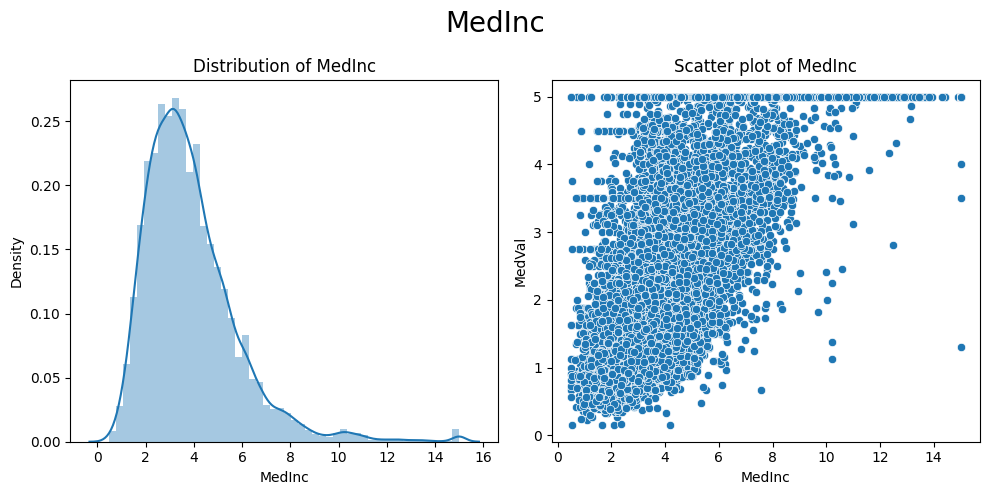

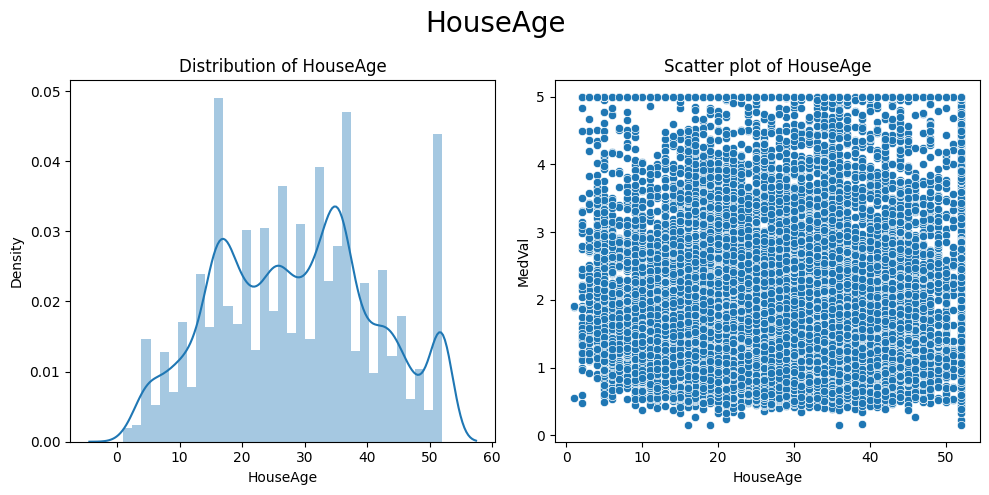

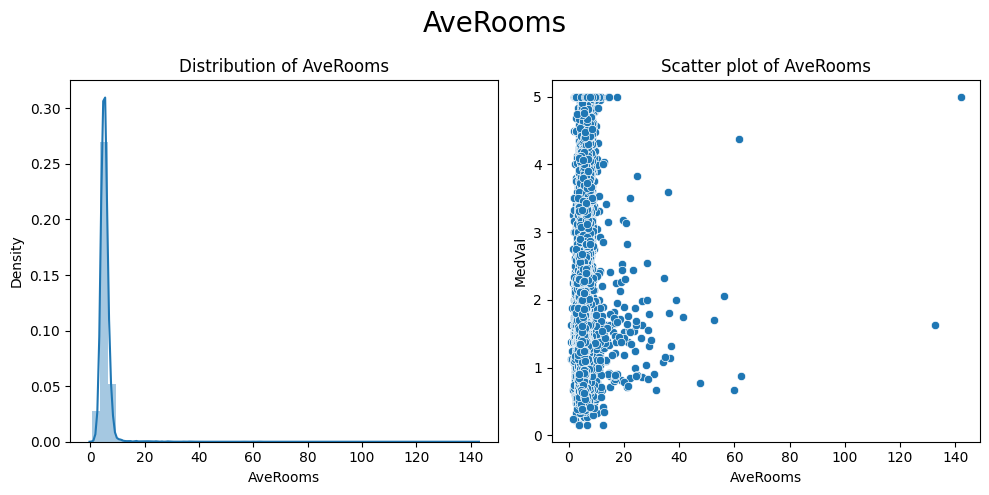

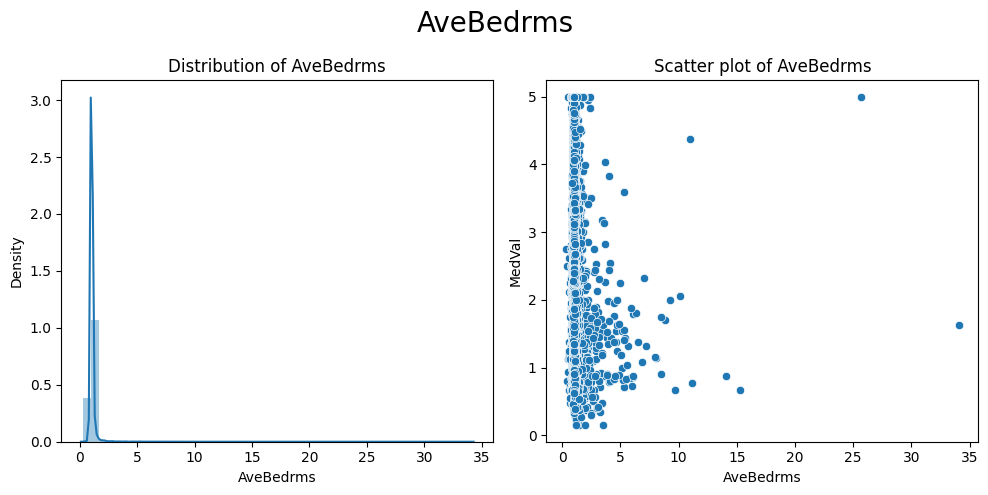

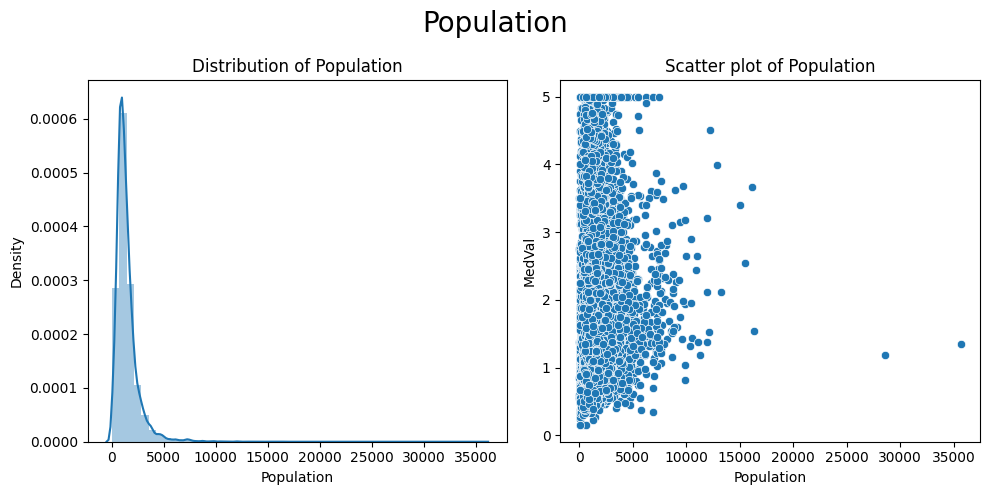

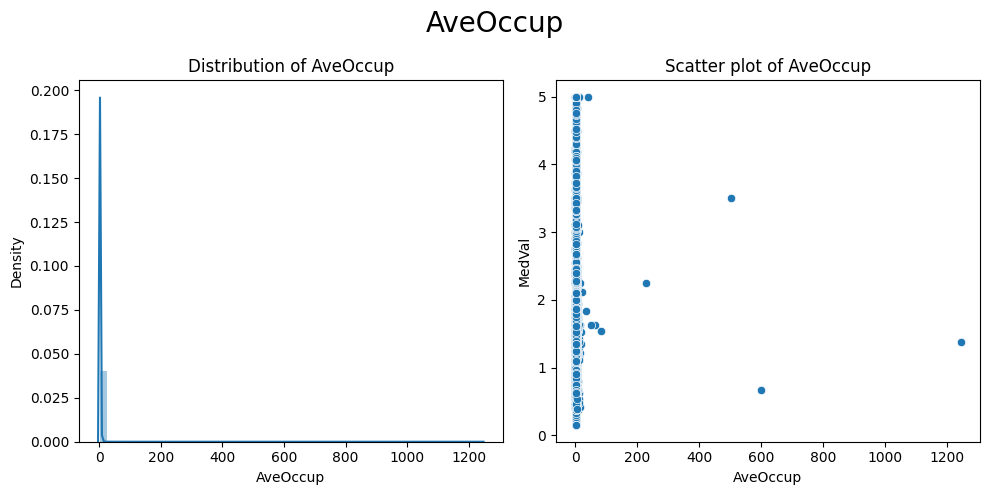

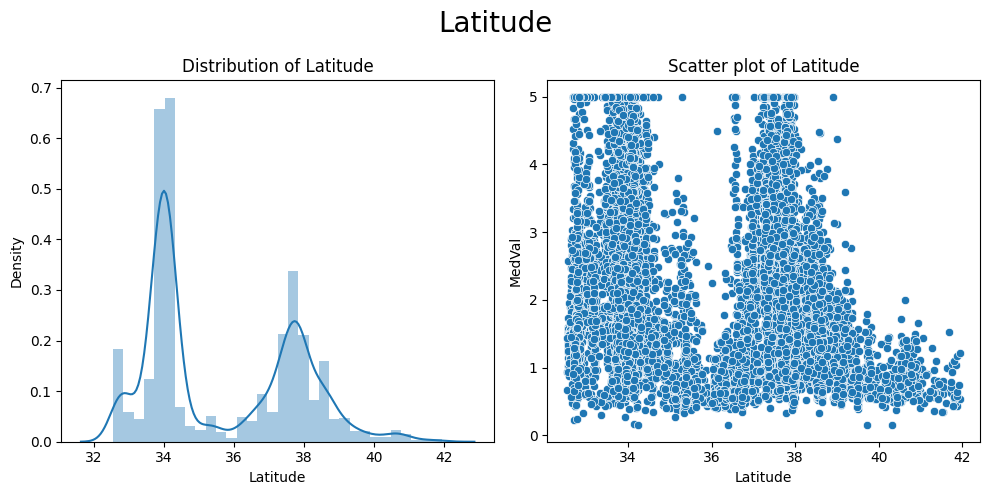

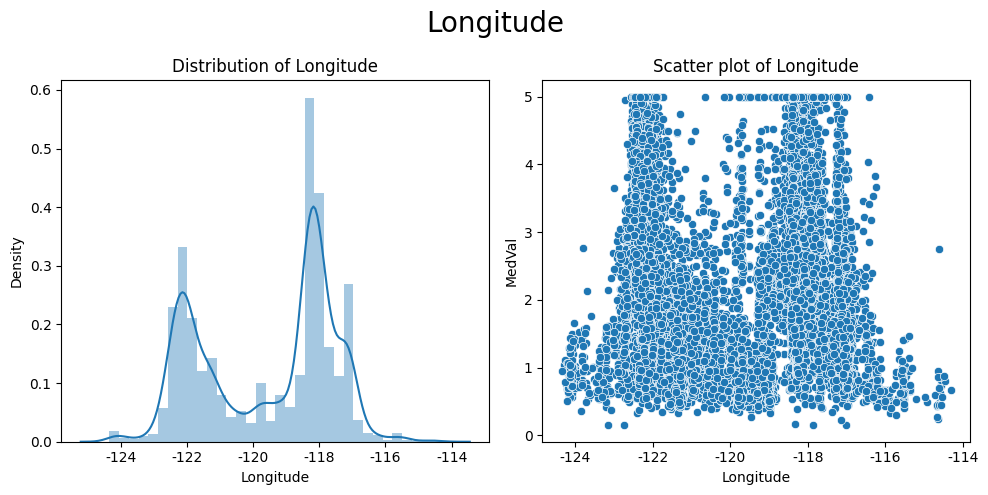

In [58]:
cols = list(x_train.columns)

for col in cols:

    target = col

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(x_train[target], kde=True, ax=ax[0])
    sns.scatterplot(x=x_train[target], y=y_train, ax=ax[1])

    ax[0].set_title('Distribution of ' + target)
    ax[1].set_title('Scatter plot of ' + target)
    plt.suptitle(f'{target}', fontsize=20)
    plt.tight_layout()
    plt.show()

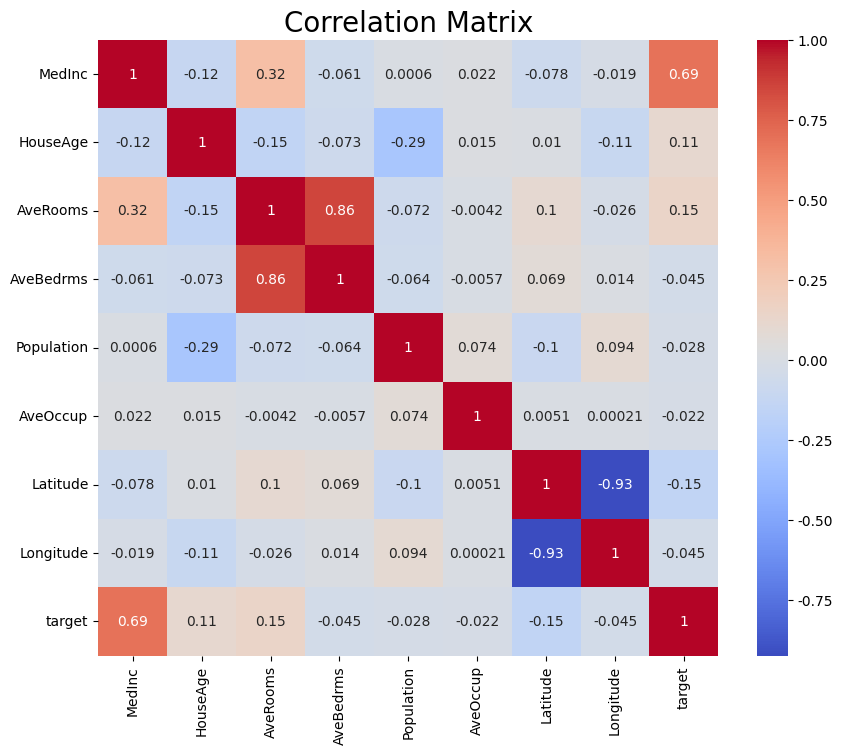

In [59]:
x_train['target'] = y_train
correlation_matrix = x_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

### Point : 위도와 경도 시각화

In [44]:
# San Francisco Bay의 좌표
center_lat_sf = 37.7749
center_lon_sf = -122.4194

# seal beach의 좌표
center_lat_sb = 33.65
center_lon_sb = -118.06

# Lake Tahoe의 좌표
center_lat_tahoe = 39.0968
center_lon_tahoe = -120.0324

# More Mesa의 좌표
center_lat_mesa = 34.4348
center_lon_mesa = -119.7910

# Pismo Beach의 좌표
center_lat_pb = 35.1428
center_lon_pb = -120.6413

In [ ]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

x_train['target'] = y_train

# San Francisco Bay의 좌표
center_lat_sf = 37.7749
center_lon_sf = -122.4194

# seal beach의 좌표
center_lat_sb = 33.65
center_lon_sb = -118.06

# Lake Tahoe의 좌표
center_lat_tahoe = 39.0968
center_lon_tahoe = -120.0324

# More Mesa의 좌표
center_lat_mesa = 34.4348
center_lon_mesa = -119.7910

# Pismo Beach의 좌표
center_lat_pb = 35.1428
center_lon_pb = -120.6413



# Calculate the center latitude and longitude
center_lat = np.mean(x_train['Latitude'])
center_lon = np.mean(x_train['Longitude'])

# Create a map centered around San Francisco Bay
m = folium.Map(location=[center_lat, center_lon], zoom_start=7, control_scale=True, scrollWheelZoom=False, dragging=False)

radius = 150
# Add circle marker for San Francisco Bay
folium.CircleMarker(
    location=[center_lat_sf, center_lon_sf],
    radius=radius,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2
).add_to(m)

# Add circle marker for Zamperini Field
folium.CircleMarker(
    location=[center_lat_sb, center_lon_sb],
    radius=radius,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.2
).add_to(m)

folium.CircleMarker(
    location=[center_lat_tahoe, center_lon_tahoe],
    radius=radius-100,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.2
).add_to(m)

# Add circle marker for Zamperini Field
folium.CircleMarker(
    location=[center_lat_mesa, center_lon_mesa],
    radius=radius-100,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2
).add_to(m)

folium.CircleMarker(
    location=[center_lat_pb, center_lon_pb],
    radius=radius-100,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.2
).add_to(m)

# Define color scale based on target values
target_min = x_train['target'].min()
target_max = x_train['target'].max()
color_map = cm.get_cmap('Reds')
color_norm = colors.Normalize(vmin=target_min, vmax=target_max)

# Add markers to the map
for index, row in x_train.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    target_val = row['target']
    
    # Get color based on target value
    color = colors.rgb2hex(color_map(color_norm(target_val)))
    
    # Create a marker with custom color
    marker = folium.CircleMarker(location=[lat, lon], color=color, fill=True, fill_color=color, fill_opacity=0.7, radius=5)
    
    # Add marker to the map
    marker.add_to(m)

# Display the map
m

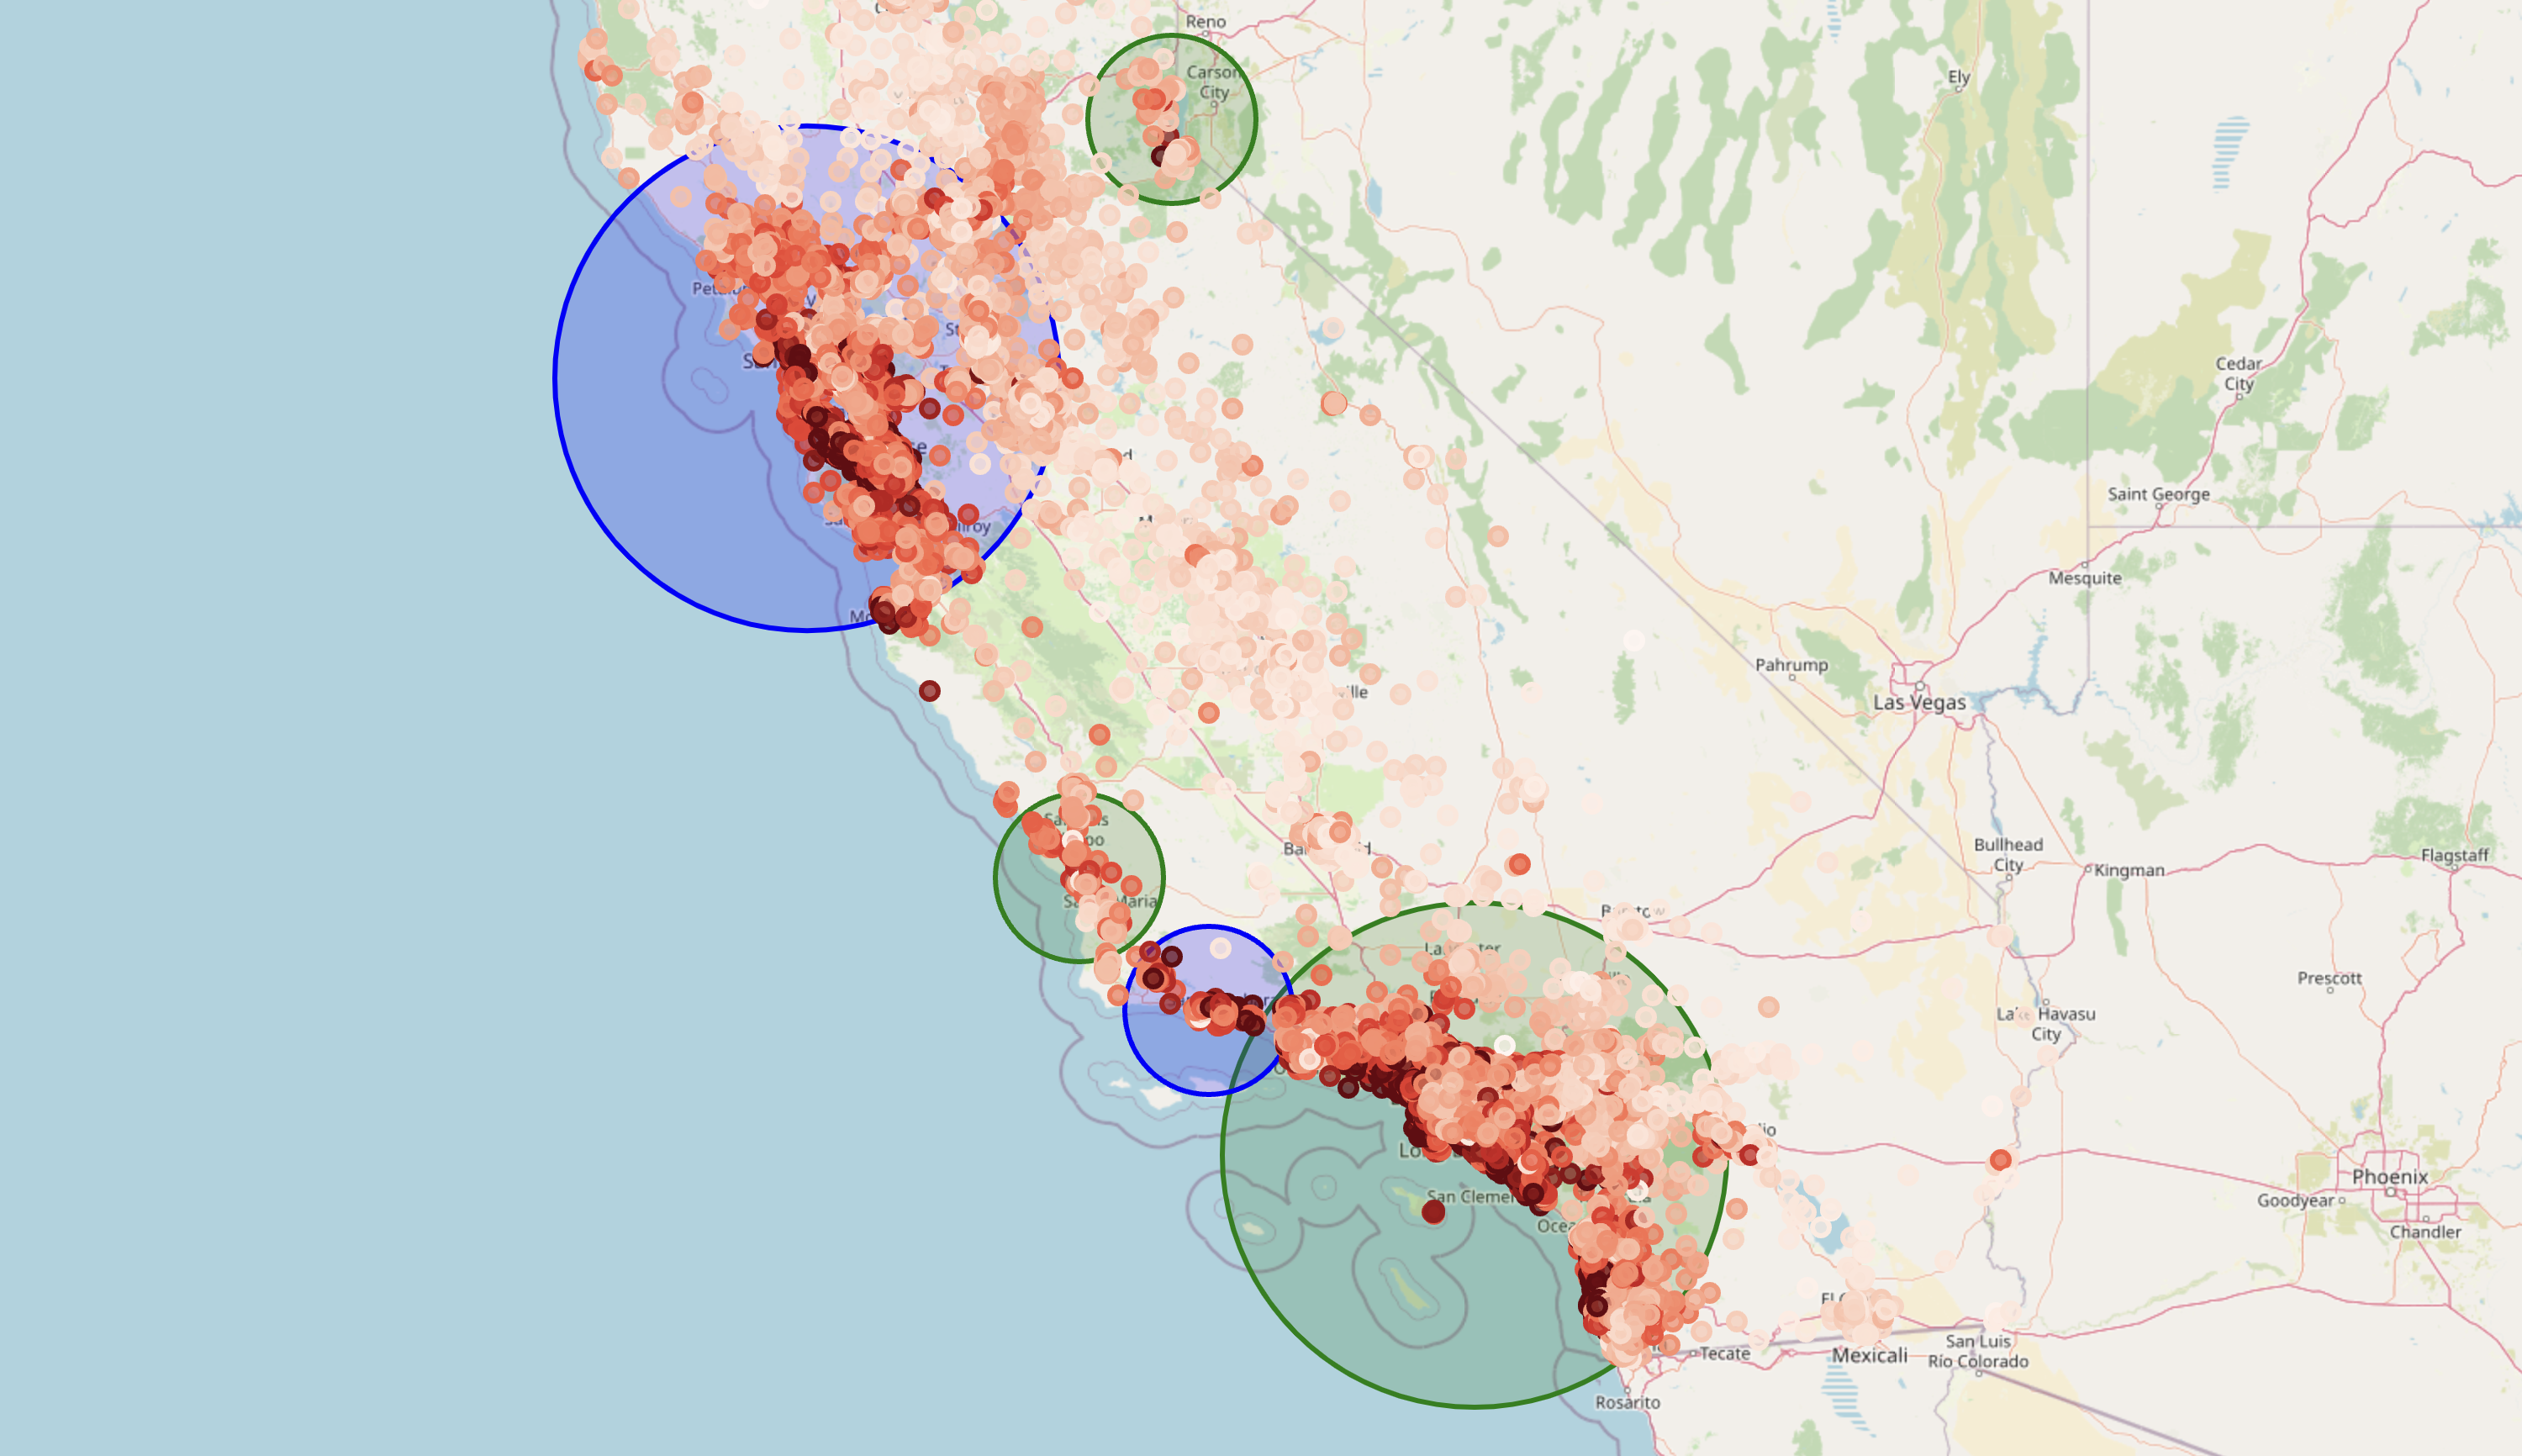

### 특정지역은 집값이 높게 형성되어 있는 것을 확인 할 수 있었다.

# 2. 전처리

### 핫 플레이스와의 유클리디안 거리 계산

1. Hot place의 위도, 경도 파악  

2. 각 sample과의 유클리디안 거리 계산  
```sqrt(( smaple longitude - hot place longitude ) ** 2 + ( smaple latitude - hot place latitude ) ** 2 )```
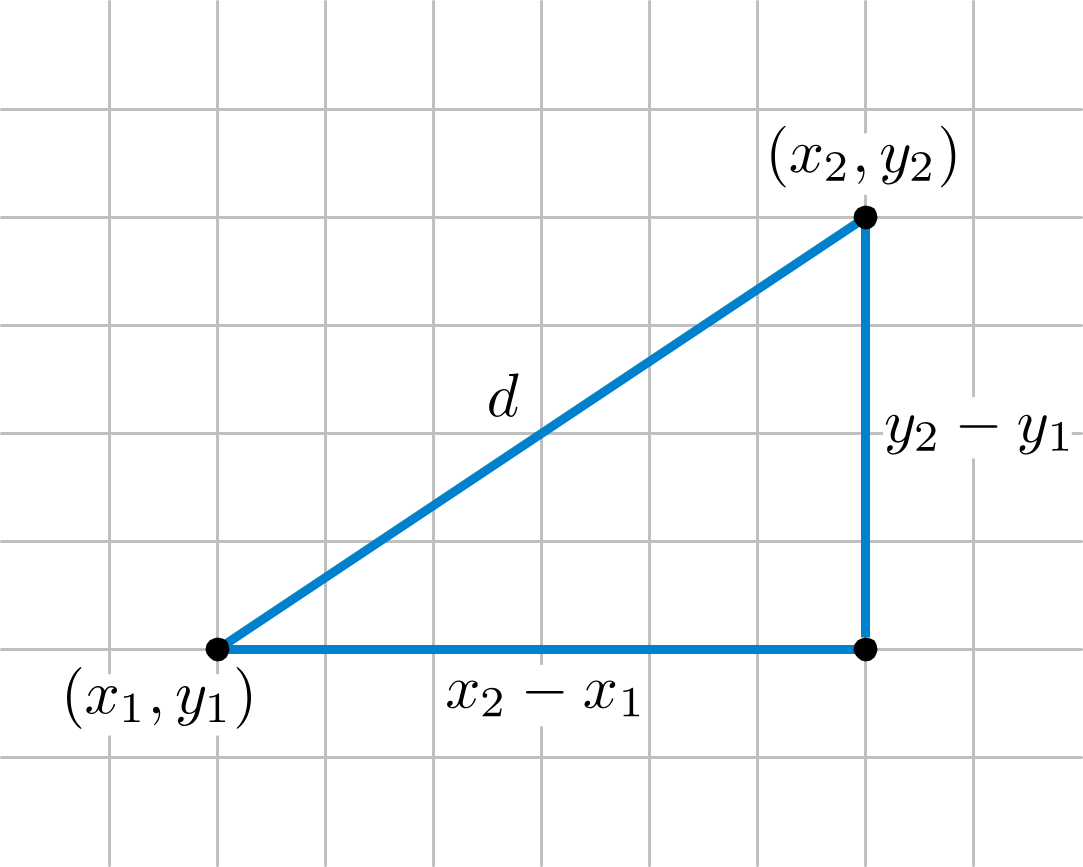
    
3. 파생변수 생성

In [29]:
x_train = pd.read_csv(path_input + 'x_trn.csv', index_col=0)
y_train = pd.read_csv(path_input + 'y_trn.csv', index_col=0)['MedVal']
x_test = pd.read_csv(path_input + 'x_tst.csv', index_col=0)

In [30]:
# San Francisco Bay의 좌표
center_lat_sf = 37.7749
center_lon_sf = -122.4194

def sanfrancisco_bay(df): # ✅
    df['sanfrancisco_bay'] = np.sqrt((df['Latitude'] - center_lat_sf)**2 + (df['Longitude'] - center_lon_sf)**2)
    return df

x_train = sanfrancisco_bay(x_train)
x_test = sanfrancisco_bay(x_test)

# seal beach의 좌표
center_lat_sb = 33.65
center_lon_sb = -118.06

def Seal_Beach(df):
    df['Seal_Beach'] = np.sqrt((df['Latitude'] - center_lat_sb)**2 + (df['Longitude'] - center_lon_sb)**2)
    return df

x_train = Seal_Beach(x_train)
x_test = Seal_Beach(x_test)

# Lake Tahoe의 좌표
center_lat_tahoe = 39.0968
center_lon_tahoe = -120.0324

def Lake_Tahoe(df):
    df['Lake_Tahoe'] = np.sqrt((df['Latitude'] - center_lat_tahoe)**2 + (df['Longitude'] - center_lon_tahoe)**2)
    return df

x_train = Lake_Tahoe(x_train)
x_test = Lake_Tahoe(x_test)

# More Mesa의 좌표
center_lat_mesa = 34.4348
center_lon_mesa = -119.7910

def More_Mesa(df):
    df['More_Mesa'] = np.sqrt((df['Latitude'] - center_lat_mesa)**2 + (df['Longitude'] - center_lon_mesa)**2)
    return df

x_train = More_Mesa(x_train)
x_test = More_Mesa(x_test)

# Pismo Beach의 좌표
center_lat_pb = 35.1428
center_lon_pb = -120.6413

def Pismo_Beach(df):
    df['Pismo_Beach'] = np.sqrt((df['Latitude'] - center_lat_pb)**2 + (df['Longitude'] - center_lon_pb)**2)
    return df

x_train = Pismo_Beach(x_train)
x_test = Pismo_Beach(x_test)

In [31]:
fi_cols = ['sanfrancisco_bay','Seal_Beach','Lake_Tahoe','More_Mesa', 'Pismo_Beach']

x_train[fi_cols]

sanfrancisco_bay  Seal_Beach  Lake_Tahoe  More_Mesa  center_lat_pb
Id                                                                       
0              6.883131    1.268897    6.205199   3.057622       4.069238
1              5.188562    0.813204    5.071682   1.170871       2.203806
2              6.031186    0.050990    5.800767   1.942235       3.020337
3              5.832377    0.170294    5.633551   1.748257       2.822153
4              0.392207    6.078001    2.385812   4.385997       3.342840
...                 ...         ...         ...        ...            ...
16507          0.676332    5.325871    2.578171   3.587805       2.528526
16508          5.336004    0.685055    5.130196   1.367969       2.386898
16509          6.295270    0.371214    5.956692   2.253464       3.321008
16510          5.829835    0.455412    5.447280   1.914169       2.930792
16511          3.472059    2.853279    2.973403   1.836621       1.698455

[16512 rows x 5 columns]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_train = pd.DataFrame(scaled_x_train, columns=x_train.columns)

scaled_x_test = scaler.transform(x_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns=x_train.columns)

print(scaled_x_train.shape)
print(scaled_x_test.shape)

(16512, 13)
(4128, 13)


# 3. 모델 정의 : CatBoostRegressor

#### CatBoostRegressor란 ?

Yandex에서 개발한 그래디언트 부스팅 트리 기반의 머신 러닝 알고리즘으로, 범주형 특징을 자동으로 처리하는 기능과 높은 성능을 제공합니다.

In [33]:
from sklearn.model_selection import train_test_split

x = scaled_x_train
y = np.array(y_train)

x_trn, x_val, y_trn, y_val = train_test_split(scaled_x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# train_test_split
x_trn, x_val, y_trn, y_val = train_test_split(scaled_x_train, y_train, test_size=0.2)

# CatBoostRegressor 모델 생성
cat_reg = CatBoostRegressor(verbose = 1)

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [1000],
    'learning_rate': [0.025, 0.05, 0.075],
    'depth': [8, 10, 12],
    'l2_leaf_reg': [0.5, 0.75, 1.0]
}

# GridSearchCV를 사용하여 그리드 서치 수행
grid_search = GridSearchCV(cat_reg, param_grid, scoring='neg_root_mean_squared_error', cv=10)
grid_search.fit(scaled_x_train, y_train) # train, valid X -> 전체 학습 데이터셋 사용

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측 수행
cat_reg_best = grid_search.best_estimator_
cat_pred = cat_reg_best.predict(x_val)

# RMSE 계산
cat_rmse = np.sqrt(mean_squared_error(y_val, cat_pred))
print("CatBoostRegressor RMSE:", cat_rmse)

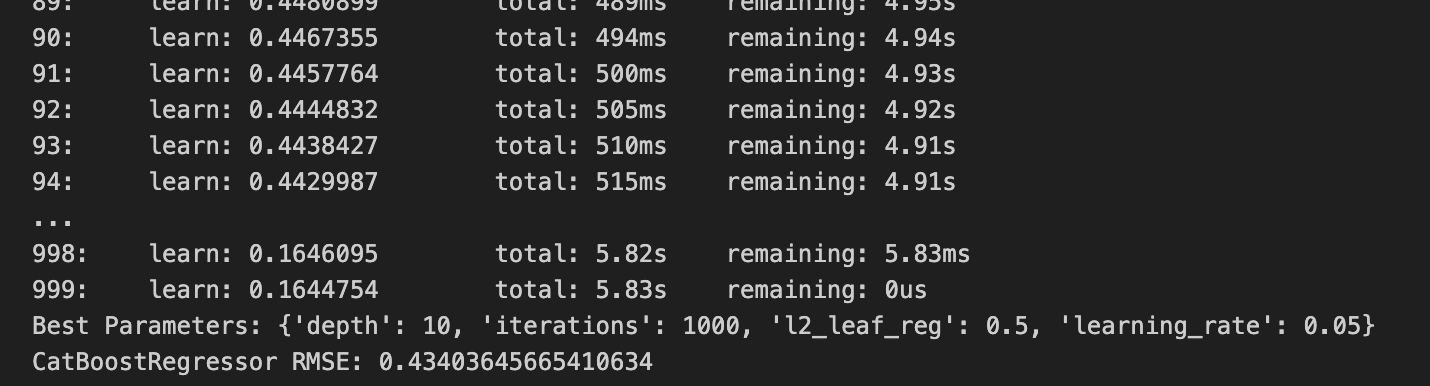

(실행시간이 길어서 캡쳐본으로 대체하였습니다)

#### GridSearchCV 를 통해 찾은 best Parameter

```
params = {
    'n_estimators': 1000,
    'l2_leaf_reg': 0.5,
    'learning_rate': 0.05,
    'depth': 10,
    'logging_level' : 'Silent'
}
```

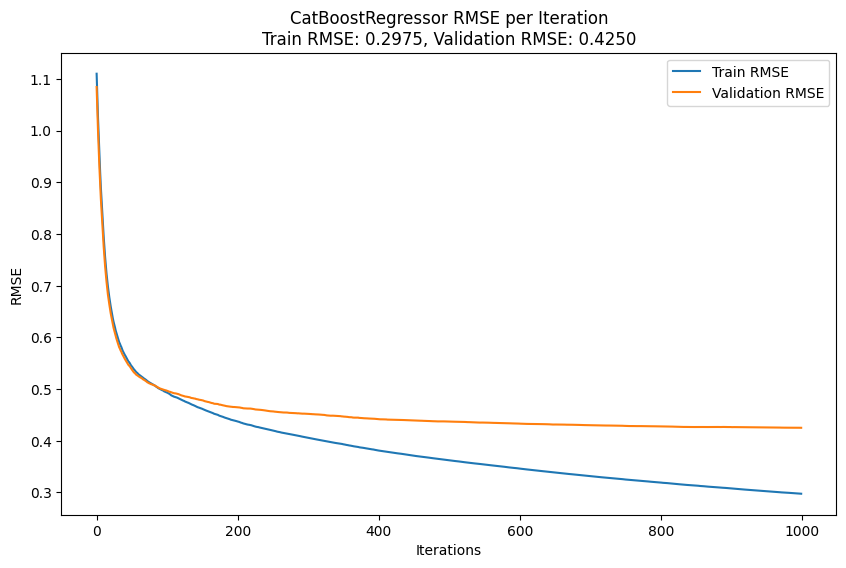

In [37]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# CatBoostRegressor Regression
cat_reg = CatBoostRegressor(random_seed=42, logging_level='Silent')
cat_reg.fit(x_trn, y_trn, eval_set=(x_val, y_val), early_stopping_rounds=50, plot=False)

# RMSE 기록 추출
train_rmse_raw = cat_reg.get_evals_result()['learn']['RMSE']
val_rmse_raw = cat_reg.get_evals_result()['validation']['RMSE']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_raw, label='Train RMSE')
plt.plot(val_rmse_raw, label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(f'CatBoostRegressor RMSE per Iteration\nTrain RMSE: {train_rmse_raw[-1]:.4f}, Validation RMSE: {val_rmse_raw[-1]:.4f}')
plt.legend()
plt.show()

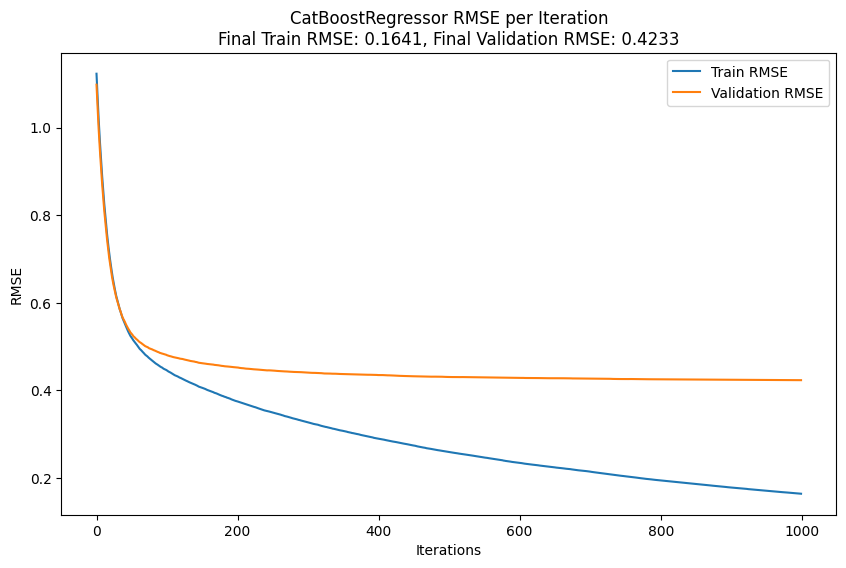

In [38]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# CatBoostRegressor Regression
params = {
    'n_estimators': 1000,
    'l2_leaf_reg': 0.5,
    'learning_rate': 0.05,
    'depth': 10,
    'logging_level' : 'Silent'
}

cat_reg = CatBoostRegressor(**params)
cat_reg.fit(x_trn, y_trn, eval_set=(x_val, y_val), verbose=False)

# RMSE 기록 추출
train_rmse_best = cat_reg.get_evals_result()['learn']['RMSE']
val_rmse_best = cat_reg.get_evals_result()['validation']['RMSE']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_best, label='Train RMSE')
plt.plot(val_rmse_best, label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title(f'CatBoostRegressor RMSE per Iteration\nFinal Train RMSE: {train_rmse_best[-1]:.4f}, Final Validation RMSE: {val_rmse_best[-1]:.4f}')
plt.legend()
plt.show()

## 4. 모델 평가

### Comparison of RMSE between Basic and Best

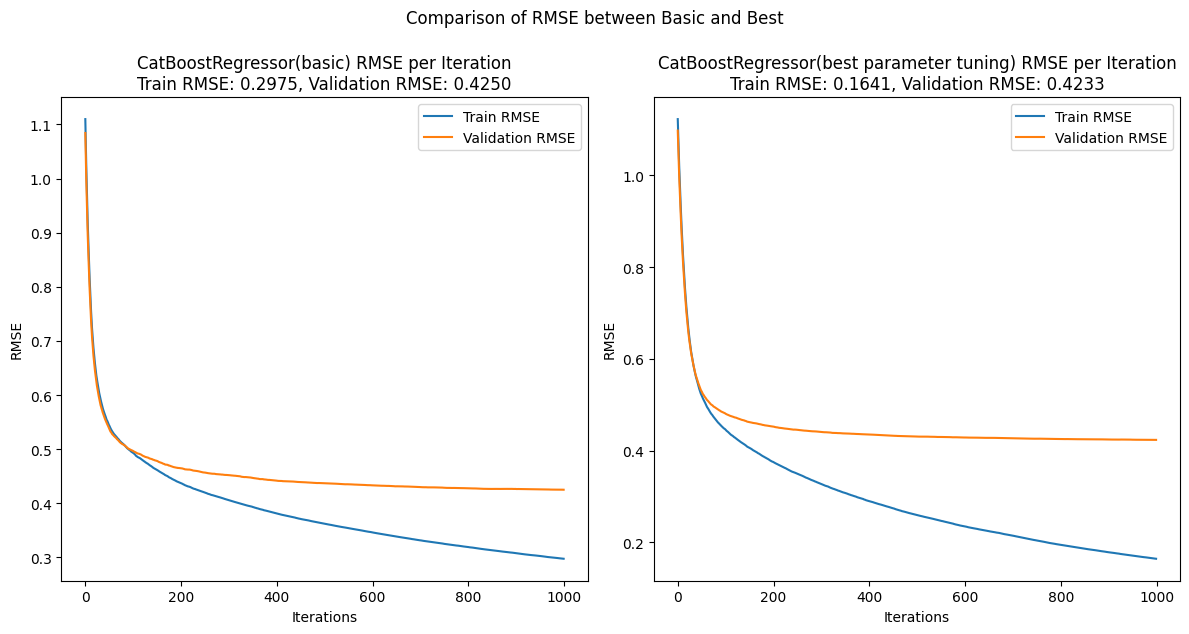

In [39]:
# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 그래프 (Train RMSE, Validation RMSE)
ax1.plot(train_rmse_raw, label='Train RMSE')
ax1.plot(val_rmse_raw, label='Validation RMSE')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('RMSE')
ax1.set_title(f'CatBoostRegressor(basic) RMSE per Iteration\nTrain RMSE: {train_rmse_raw[-1]:.4f}, Validation RMSE: {val_rmse_raw[-1]:.4f}')
ax1.legend()

# 두 번째 그래프 (Train RMSE)
ax2.plot(train_rmse_best, label='Train RMSE')
ax2.plot(val_rmse_best, label='Validation RMSE')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('RMSE')
ax2.set_title(f'CatBoostRegressor(best parameter tuning) RMSE per Iteration\nTrain RMSE: {train_rmse_best[-1]:.4f}, Validation RMSE: {val_rmse_best[-1]:.4f}')
ax2.legend()

# 두 번째 그래프의 x축 범위 설정
min_x = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
max_x = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ax1.set_xlim(min_x, max_x)
ax2.set_xlim(min_x, max_x)

# 서브플롯 간 간격 조정
plt.tight_layout()

# 전체 그래프 제목 설정
plt.suptitle('Comparison of RMSE between Basic and Best', y=1.05)

# 그래프 출력
plt.show()


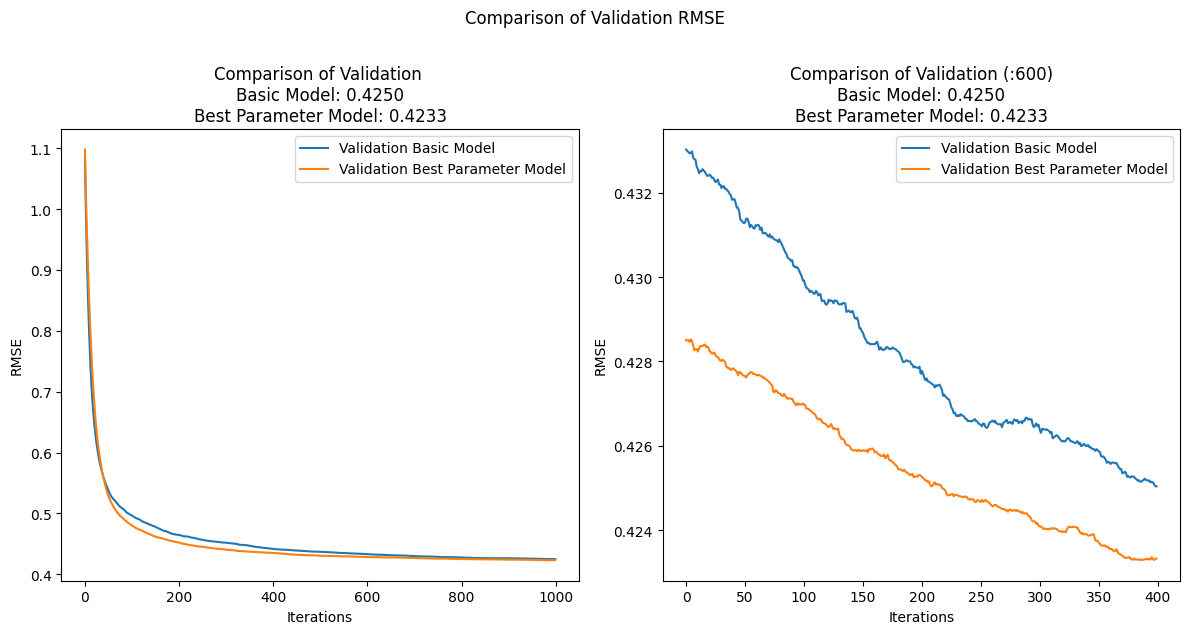

In [45]:
# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 그래프 (Train RMSE, Validation RMSE)
ax1.plot(val_rmse_raw, label='Validation Basic Model')
ax1.plot(val_rmse_best, label='Validation Best Parameter Model')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('RMSE')
ax1.set_title(f'Comparison of Validation \nBasic Model: {val_rmse_raw[-1]:.4f}\nBest Parameter Model: {val_rmse_best[-1]:.4f}')
ax1.legend()

# 두 번째 그래프 (Train RMSE)
ax2.plot(val_rmse_raw[600:], label='Validation Basic Model')
ax2.plot(val_rmse_best[600:], label='Validation Best Parameter Model')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('RMSE')
ax2.set_title(f'Comparison of Validation (:600)\nBasic Model: {val_rmse_raw[-1]:.4f}\nBest Parameter Model: {val_rmse_best[-1]:.4f}')
ax2.legend()

# 서브플롯 간 간격 조정
plt.tight_layout()

# 전체 그래프 제목 설정
plt.suptitle('Comparison of Validation RMSE', y=1.05)

# 그래프 출력
plt.subplots_adjust(top=0.85)

plt.show()


##### GridSearchCV 를 통해 찾아낸 Best Parameter가 학습성능에 긍정적인 영향을 미친 것을 확인

### Feature importnace

Feature #1: MedInc, Importance: 23.88393329094493
Feature #2: AveOccup, Importance: 12.784889793318484
Feature #3: Lake_Tahoe, Importance: 8.402292315992579
Feature #4: Latitude, Importance: 7.617945009908571
Feature #5: sanfrancisco_bay, Importance: 6.8356604639141025
Feature #6: HouseAge, Importance: 6.306064226818011
Feature #7: center_lat_pb, Importance: 5.740221329444111
Feature #8: Seal_Beach, Importance: 5.551052199045315
Feature #9: AveRooms, Importance: 5.492387012018493
Feature #10: More_Mesa, Importance: 5.137599039052896
Feature #11: Longitude, Importance: 4.729600986770302
Feature #12: Population, Importance: 3.87966109691252
Feature #13: AveBedrms, Importance: 3.638693235859672


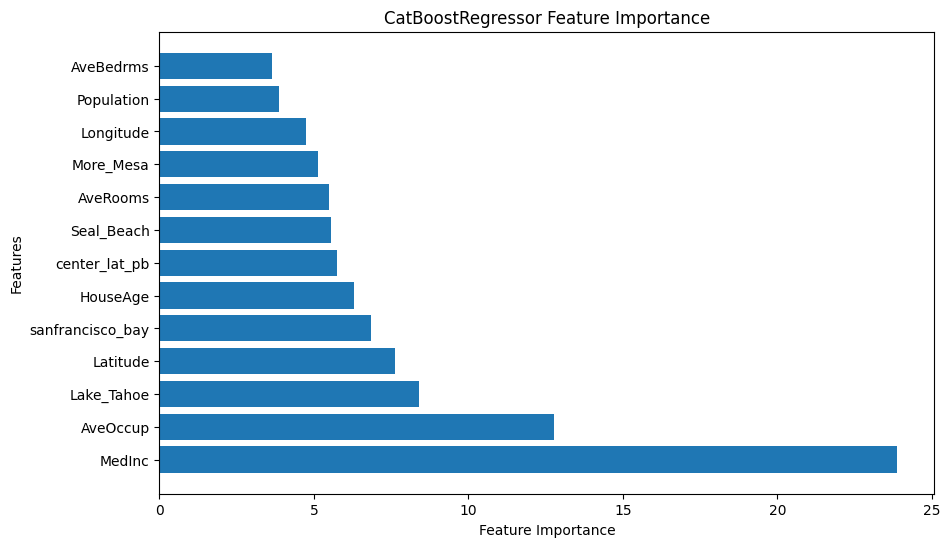

In [41]:
# Feature Importance 추출
feature_importance = cat_reg.feature_importances_

# 중요도 기준으로 피처 순위 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 피처 이름과 중요도 출력
for i, idx in enumerate(sorted_idx):
    print(f"Feature #{i+1}: {x_trn.columns[idx]}, Importance: {feature_importance[idx]}")

# 중요도 기준으로 피처 순위 정렬된 배열 생성
sorted_feature_names = [x_trn.columns[idx] for idx in sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoostRegressor Feature Importance')
plt.show()


#### 파생변수를 강조한 Feature importance Plot

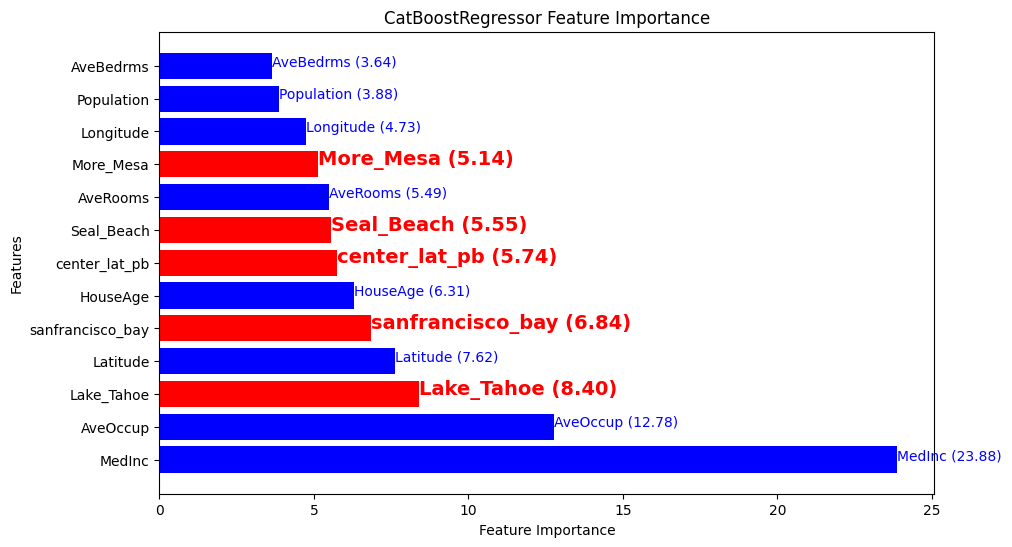

In [42]:
# 원하는 열을 다른 색으로 표시하기 위한 리스트 생성
highlight_cols = fi_cols  # fi_cols에 포함된 열은 파란색으로 표시

# Feature Importance 추출
feature_importance = cat_reg.feature_importances_

# 중요도 기준으로 피처 순위 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 그래프 색상 리스트 초기화
colors = ['red' if x_trn.columns[idx] in highlight_cols else 'blue' for idx in sorted_idx]

# 피처 이름과 중요도 출력 및 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center', color=colors)

# 원하는 칼럼의 두께 설정
for i, feature_name in enumerate(sorted_feature_names):
    if feature_name in fi_cols:
        plt.text(sorted_feature_importance[i], i, f"{feature_name} ({sorted_feature_importance[i]:.2f})", color='red', fontweight='bold', fontsize=14)
    else:
        plt.text(sorted_feature_importance[i], i, f"{feature_name} ({sorted_feature_importance[i]:.2f})", color='blue')

plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoostRegressor Feature Importance')
plt.show()



# 최종 점수  
### Public : 0.42605
### Private : 0.40999

# 결론!

### 첫째도 EDA
### 둘째도 EDA
### 셋째는 고민

##### 실제로 데이터 분석가는 전처리를 하는데 전체 분석의 70~80%의 시간을 쏟습니다.

##### EDA란? 
##### 데이터의 특성과 패턴을 이해하고 시각화하여 데이터에 대한 인사이트를 얻는 과정

##### 이렇게 얻은 인사이트를 기반으로 전처리를 수행하여 모델의 성능을 향상시킬 수 있다!